# External modules

In [53]:
library(tidyverse)
library(readr)
library(DescTools)

# Internal functions

In [54]:
path <- ".."

xfun::in_dir(dir = path, expr = source("./src/impute_outliers.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_nlargest_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima_with_indexes.R"))

xfun::in_dir(dir = path, expr = source("./src/get_standard_scaled_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_and_standard_scaled_data.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_modes.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_modes.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_gev_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_gev_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_single_gev_model.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_gev_models.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_ns_gev_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_single_ns_gev_model.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_gev_models.R"))

xfun::in_dir(dir = path, expr = source("./src/get_ns_gev_model_normalized_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/get_several_ns_gev_model_normalized_parameters.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_several_standardized_block_maxima_mean.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_standardized_block_maxima_mean.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_several_standardized_block_maxima_mean.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_several_ns_standardized_block_maxima_mean.R"))

xfun::in_dir(dir = path, expr = source("./src/fit_stationary_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/fit_non_stationary_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_fit_stationary_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_fit_non_stationary_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_stationary_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_non_stationary_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_stationary_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_non_stationary_gev_mixture_model_quantile.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_estimate_stationary_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_estimate_non_stationary_gev_mixture_model_quantile.R"))

In [55]:
options(repr.plot.width=19, repr.plot.height=12)

# Data

In [56]:
n <- 10000

x <- rexp(n)

# EDA

------------------------------------------------------------------------------ 
x (numeric)

           length                n              NAs           unique'
           10'000           10'000                0              = n
                            100.0%             0.0%                 
                                                                    
              .05              .10              .25           median
  0.0522310028653  0.1039948148602  0.2908081506761  0.7032406057000
                                                                    
            range               sd            vcoef              mad
  9.8840534186800  0.9978567184785  0.9933580572417  0.7217189019422
                                                                    
               0s             mean           meanCI
                0  1.0045287408745  0.9849687408697
             0.0%                   1.0240887408792
                                                   
        

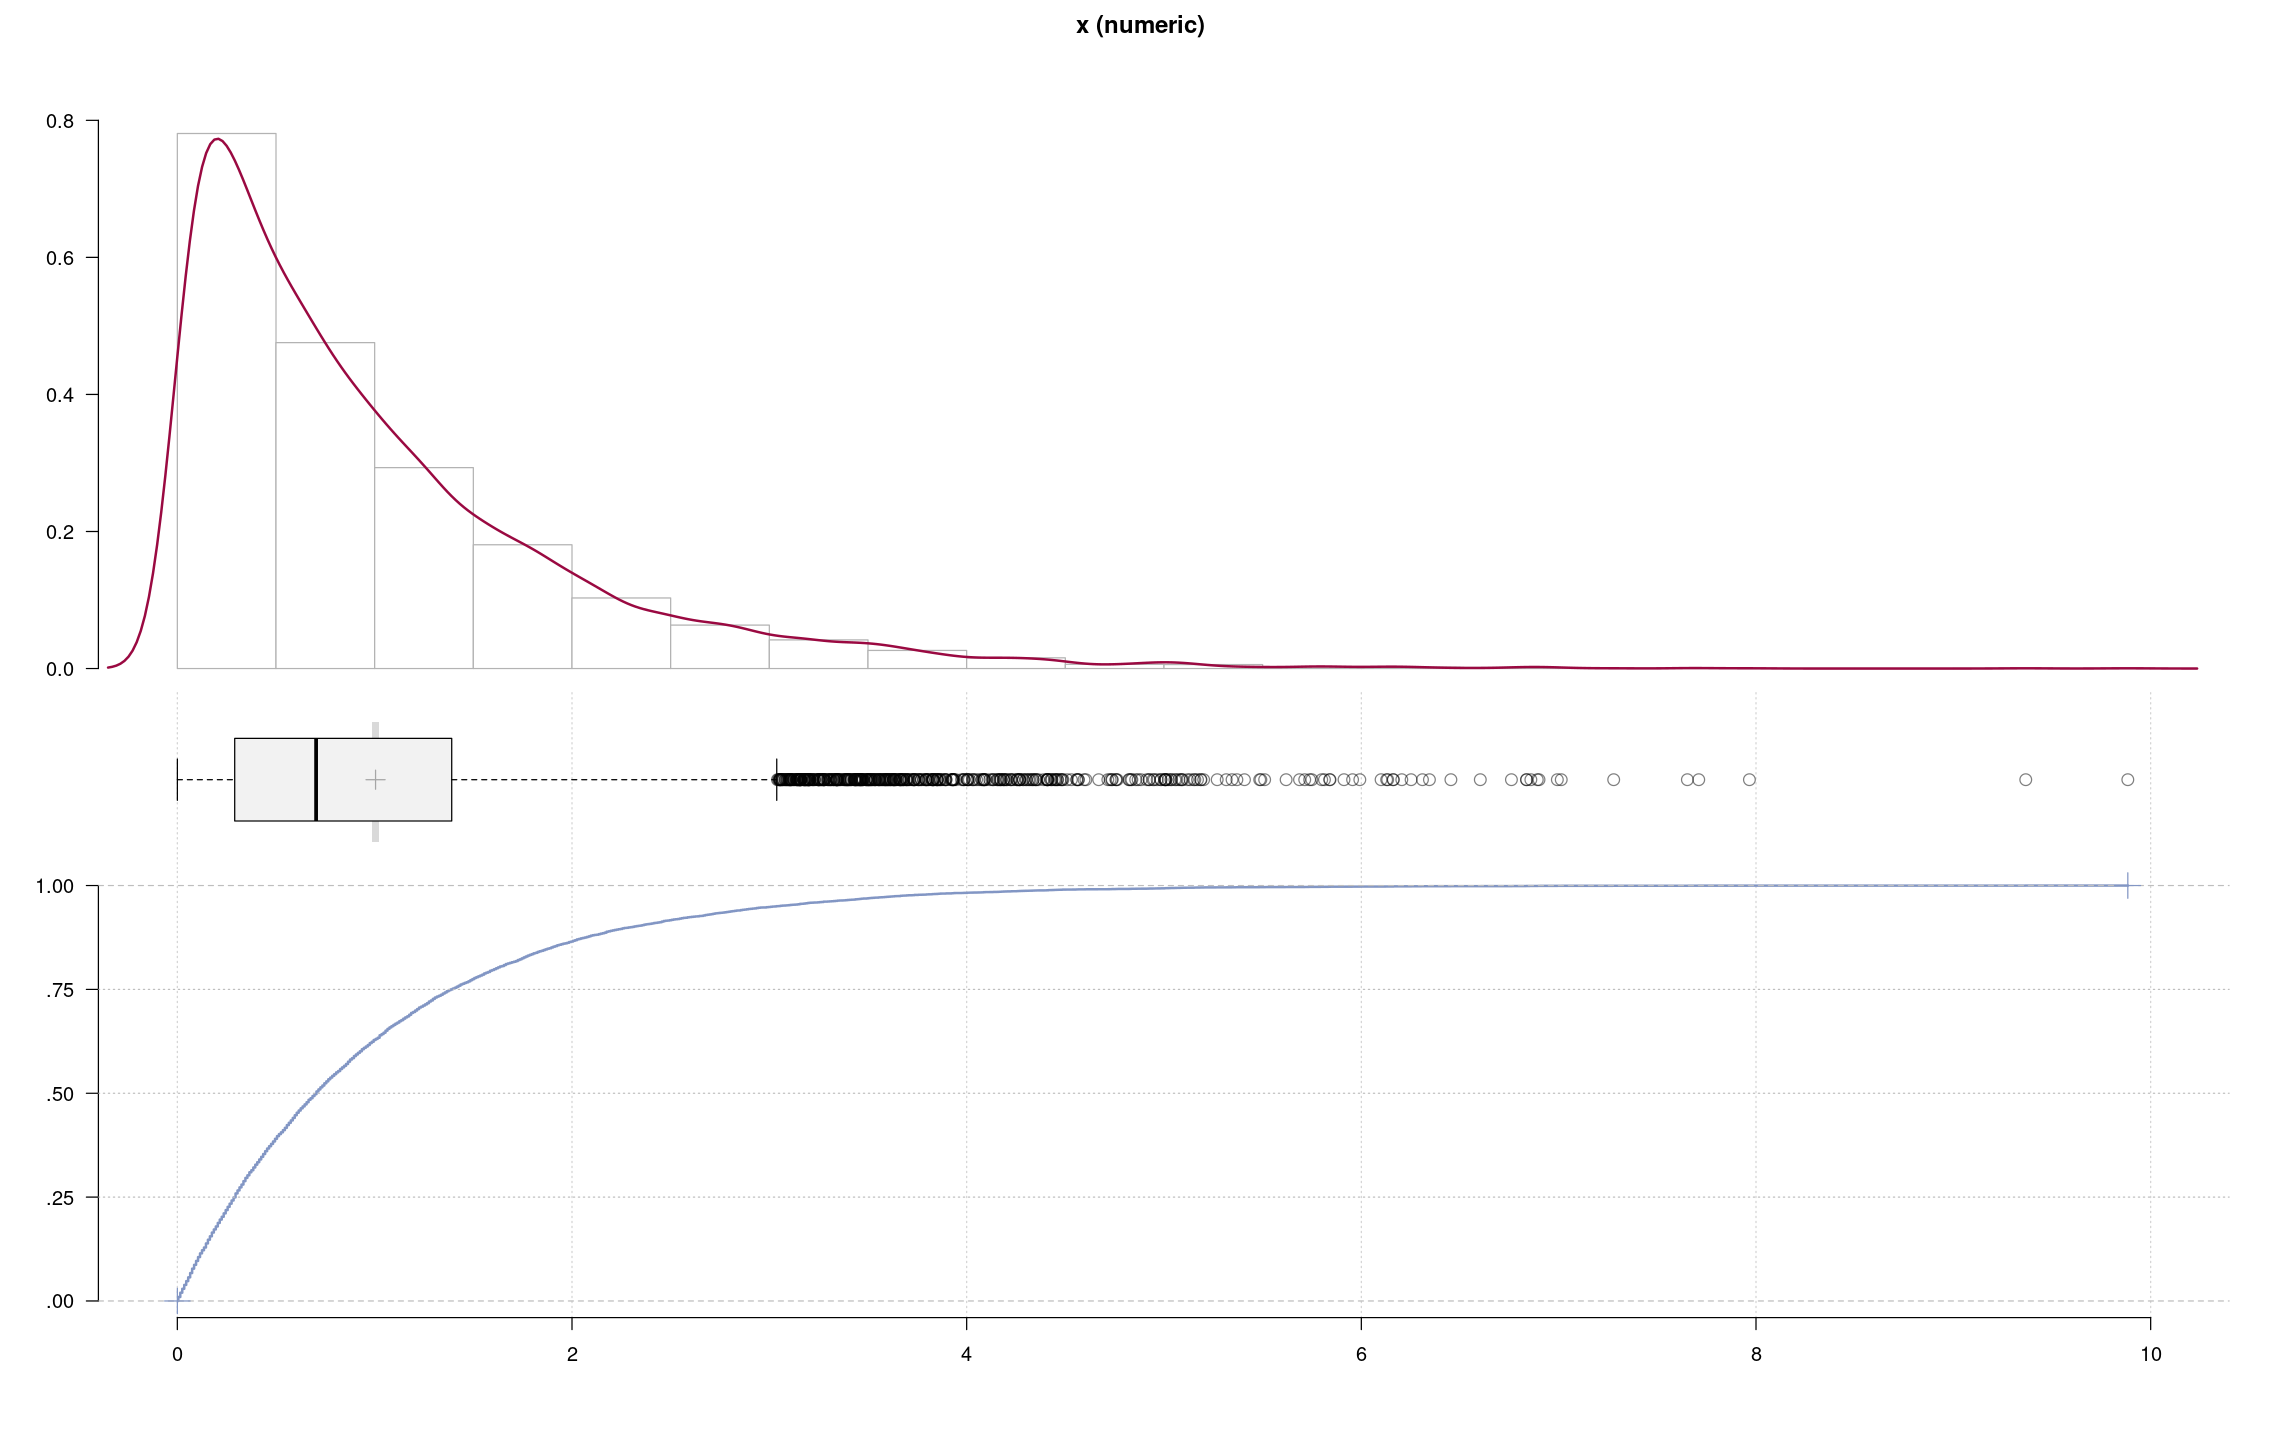

In [57]:
options(repr.plot.width=19, repr.plot.height=12)

Desc(x)

In [58]:
# options(repr.plot.width=19, repr.plot.height=12)
# 
# nlargest <- 3000
# y <- extract_nlargest_sample(x, n = nlargest)
# Desc(y)

# Estimation

In [59]:
minimum_block_size <- find_minimum_block_size(x, threshold = NULL)

print(minimum_block_size)

[1] 0.208361076


In [71]:
maximum_block_size <- find_block_size_associated_with_given_number_of_blocks(x, m = 50)

print(maximum_block_size)

[1] 0.7032406057


In [ ]:
maxima <- extract_block_maxima(x, block_size = minimum_block_size)

print(min(maxima))

In [ ]:
print(median(x))

In [ ]:
print(calculate_mode(x))

In [ ]:
candidate_block_sizes <- get_candidate_block_sizes(x, threshold = NULL, m = 50)

print(candidate_block_sizes)

In [72]:
gev_mixture_model_object <- fit_stationary_gev_mixture_model(x = x,
                                                             nlargest = Inf,
                                                             block_sizes = NULL,
                                                             minimum_nblocks = 50,
                                                             threshold = 0.208,
                                                             confidence_level = 0.95,
                                                             use_extremal_index = TRUE,
                                                             use_uniform_prior = TRUE,
                                                             method = c("MLE", "GMLE", "Lmoments")[1])


In [73]:
print(names(gev_mixture_model_object))

 [1] "threshold"                            
 [2] "candidate_block_sizes"                
 [3] "equivalent_block_sizes"               
 [4] "unequivalent_block_sizes"             
 [5] "selected_block_sizes"                 
 [6] "unselected_block_sizes"               
 [7] "failed_block_sizes"                   
 [8] "use_uniform_prior"                    
 [9] "weights"                              
[10] "frequencies"                          
[11] "use_extremal_index"                   
[12] "extremal_indexes"                     
[13] "negative_log_likelihoods"             
[14] "information_criteria"                 
[15] "unnormalized_gev_parameters_object"   
[16] "normalized_gev_parameters_object"     
[17] "full_normalized_gev_parameters_object"
[18] "partial_data"                         
[19] "all_data"                             
[20] "selected_model_per_obs"               
[21] "selected_gev_models"                  
[22] "several_residuals"                    
[23] "seve

In [74]:
print(gev_mixture_model_object$full_normalized_gev_parameters_object)

         loc_star   scale_star     shape_star
6    0.3818638992 0.7920788752  0.06148100547
87  -1.3095928519 1.5473769455 -0.07322197891
98   0.5979201110 0.7917060798  0.04278776800
113  0.1924857957 1.0123586146 -0.00715789519
157 -1.1605966790 1.5167458706 -0.07297044896
182 -1.7187165553 1.6358288381 -0.07517466729
197  0.7426845378 0.8204345368  0.02238122705


In [75]:
print(gev_mixture_model_object$weights)

              6              87              98             113             157 
0.0656987828127 0.0001466490688 0.2667546561079 0.0055726646136 0.0046927702009 
            182             197 
0.0002932981376 0.6568411790585 


In [76]:
print(which.max(gev_mixture_model_object$weights))

197 
  7 


In [77]:
print(which.max(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star))

[1] 1


In [78]:
print(which.min(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star))

[1] 6


In [79]:
print(gev_mixture_model_object$information_criteria)

        AIC         BIC 
6540.465765 6735.144955 


In [80]:
print(gev_mixture_model_object$threshold)

[1] 0.3845837163


# Diagnostic

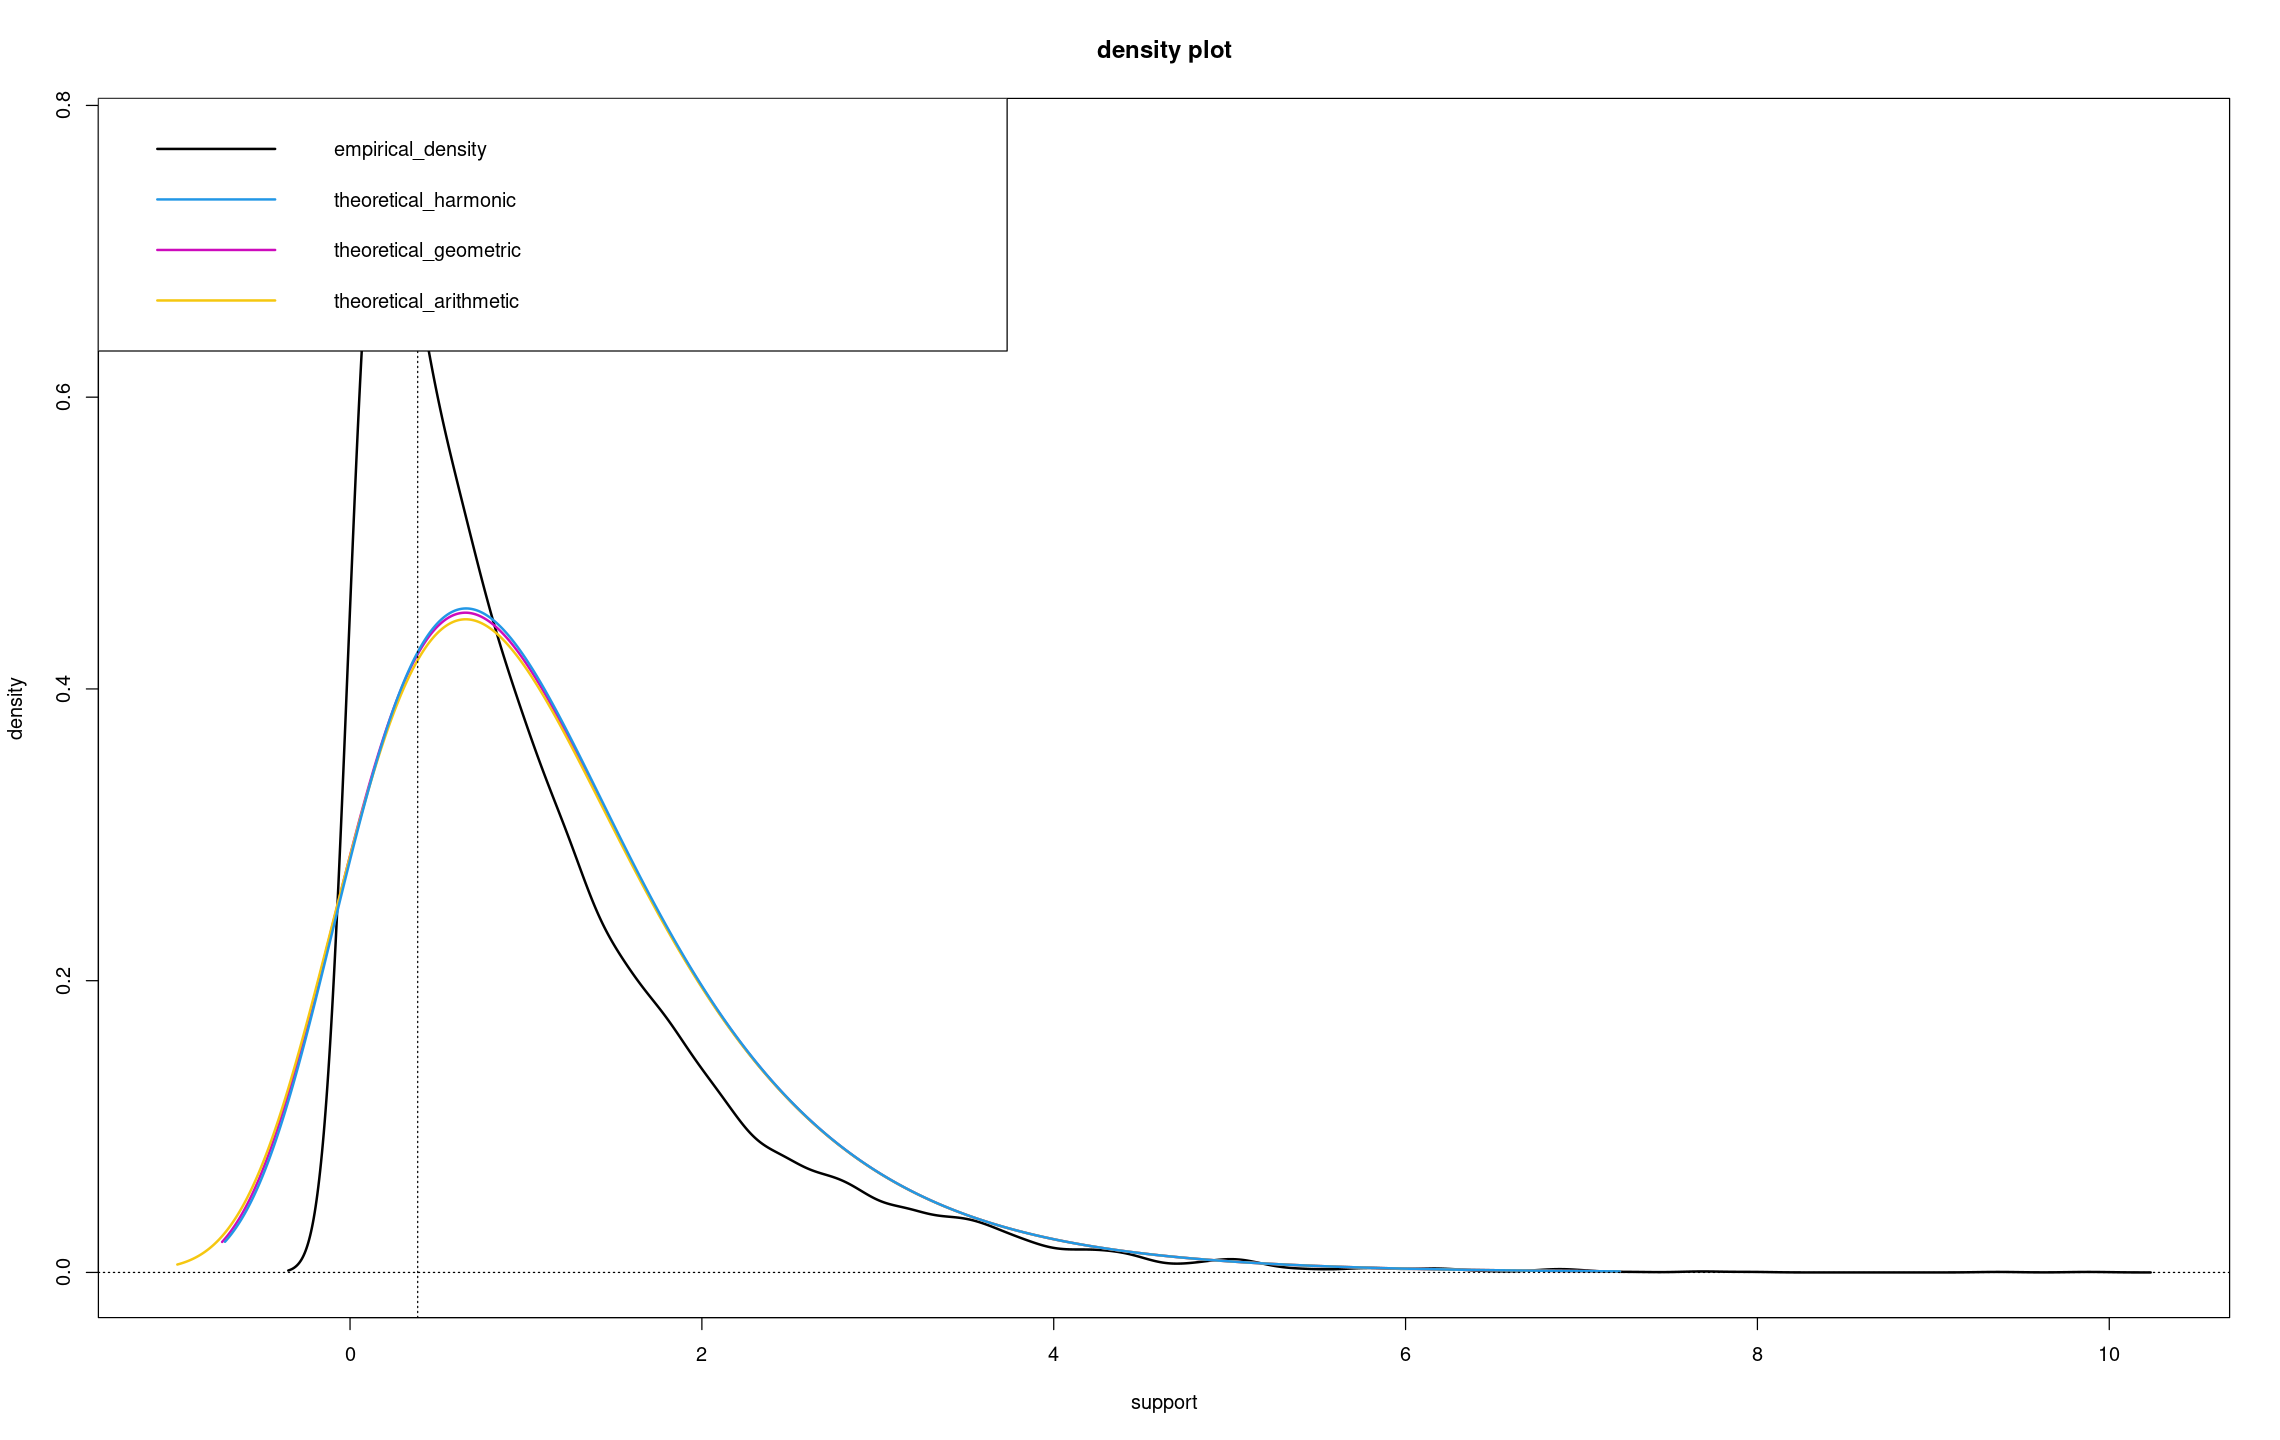

In [81]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = 0,
                                      iterations = 10,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topleft")

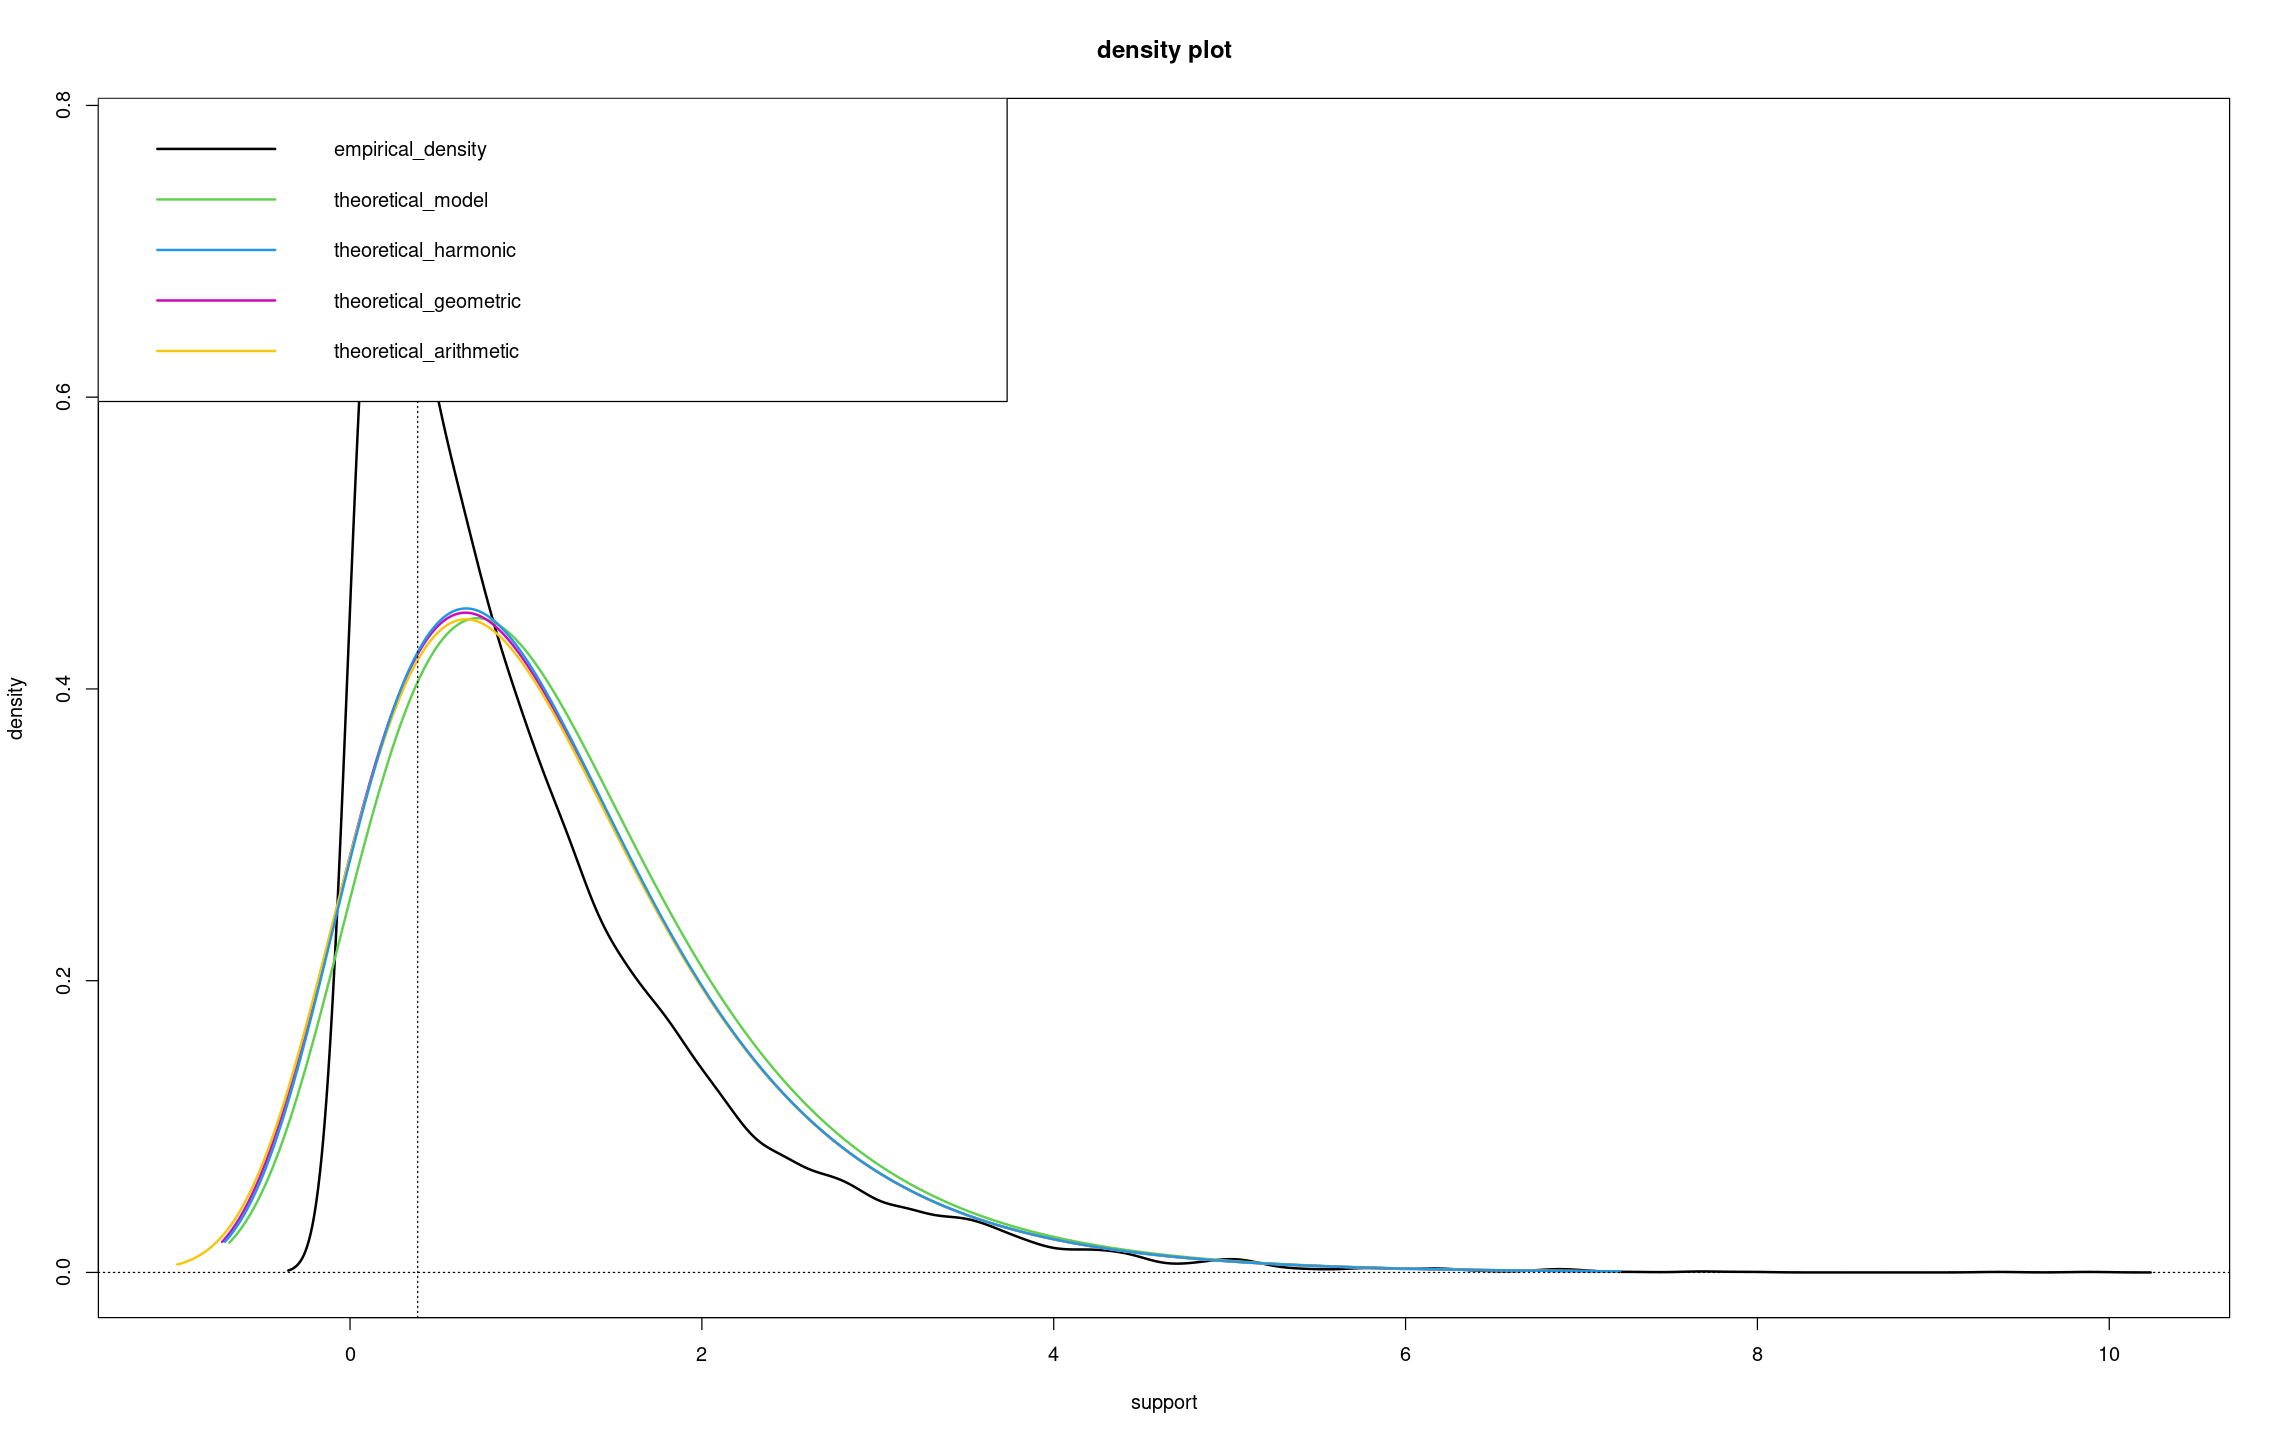

In [82]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.max(gev_mixture_model_object$weights),
                                      iterations = 10,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topleft")

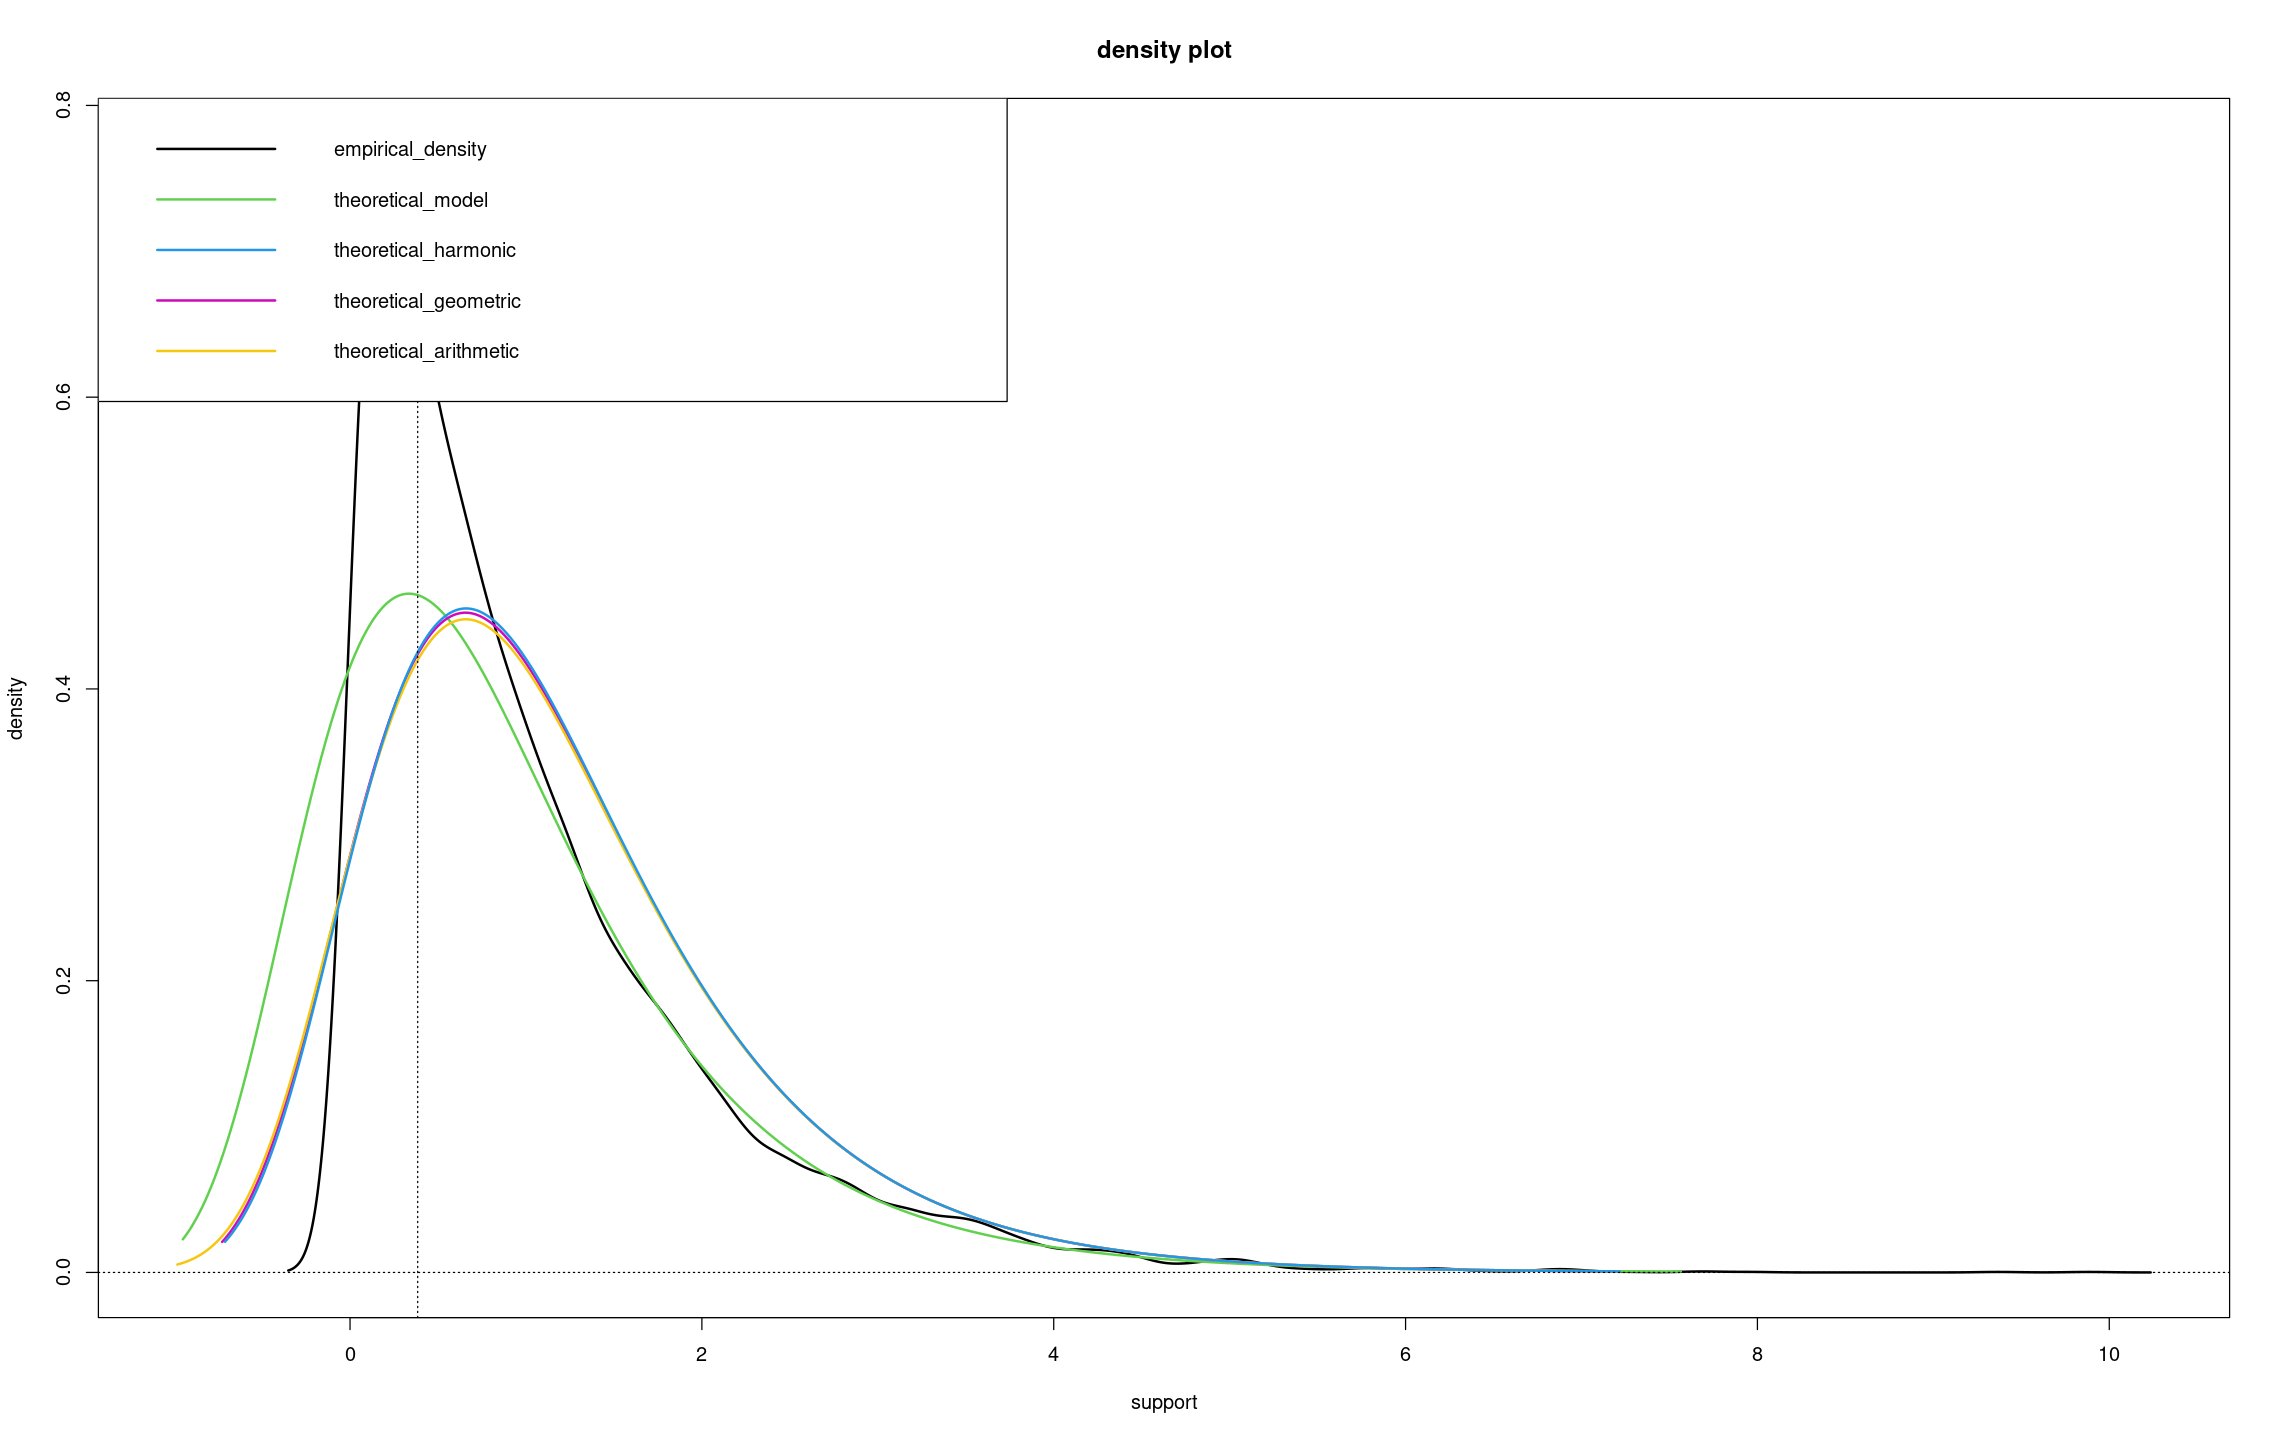

In [83]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.max(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star),
                                      iterations = 10,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topleft")

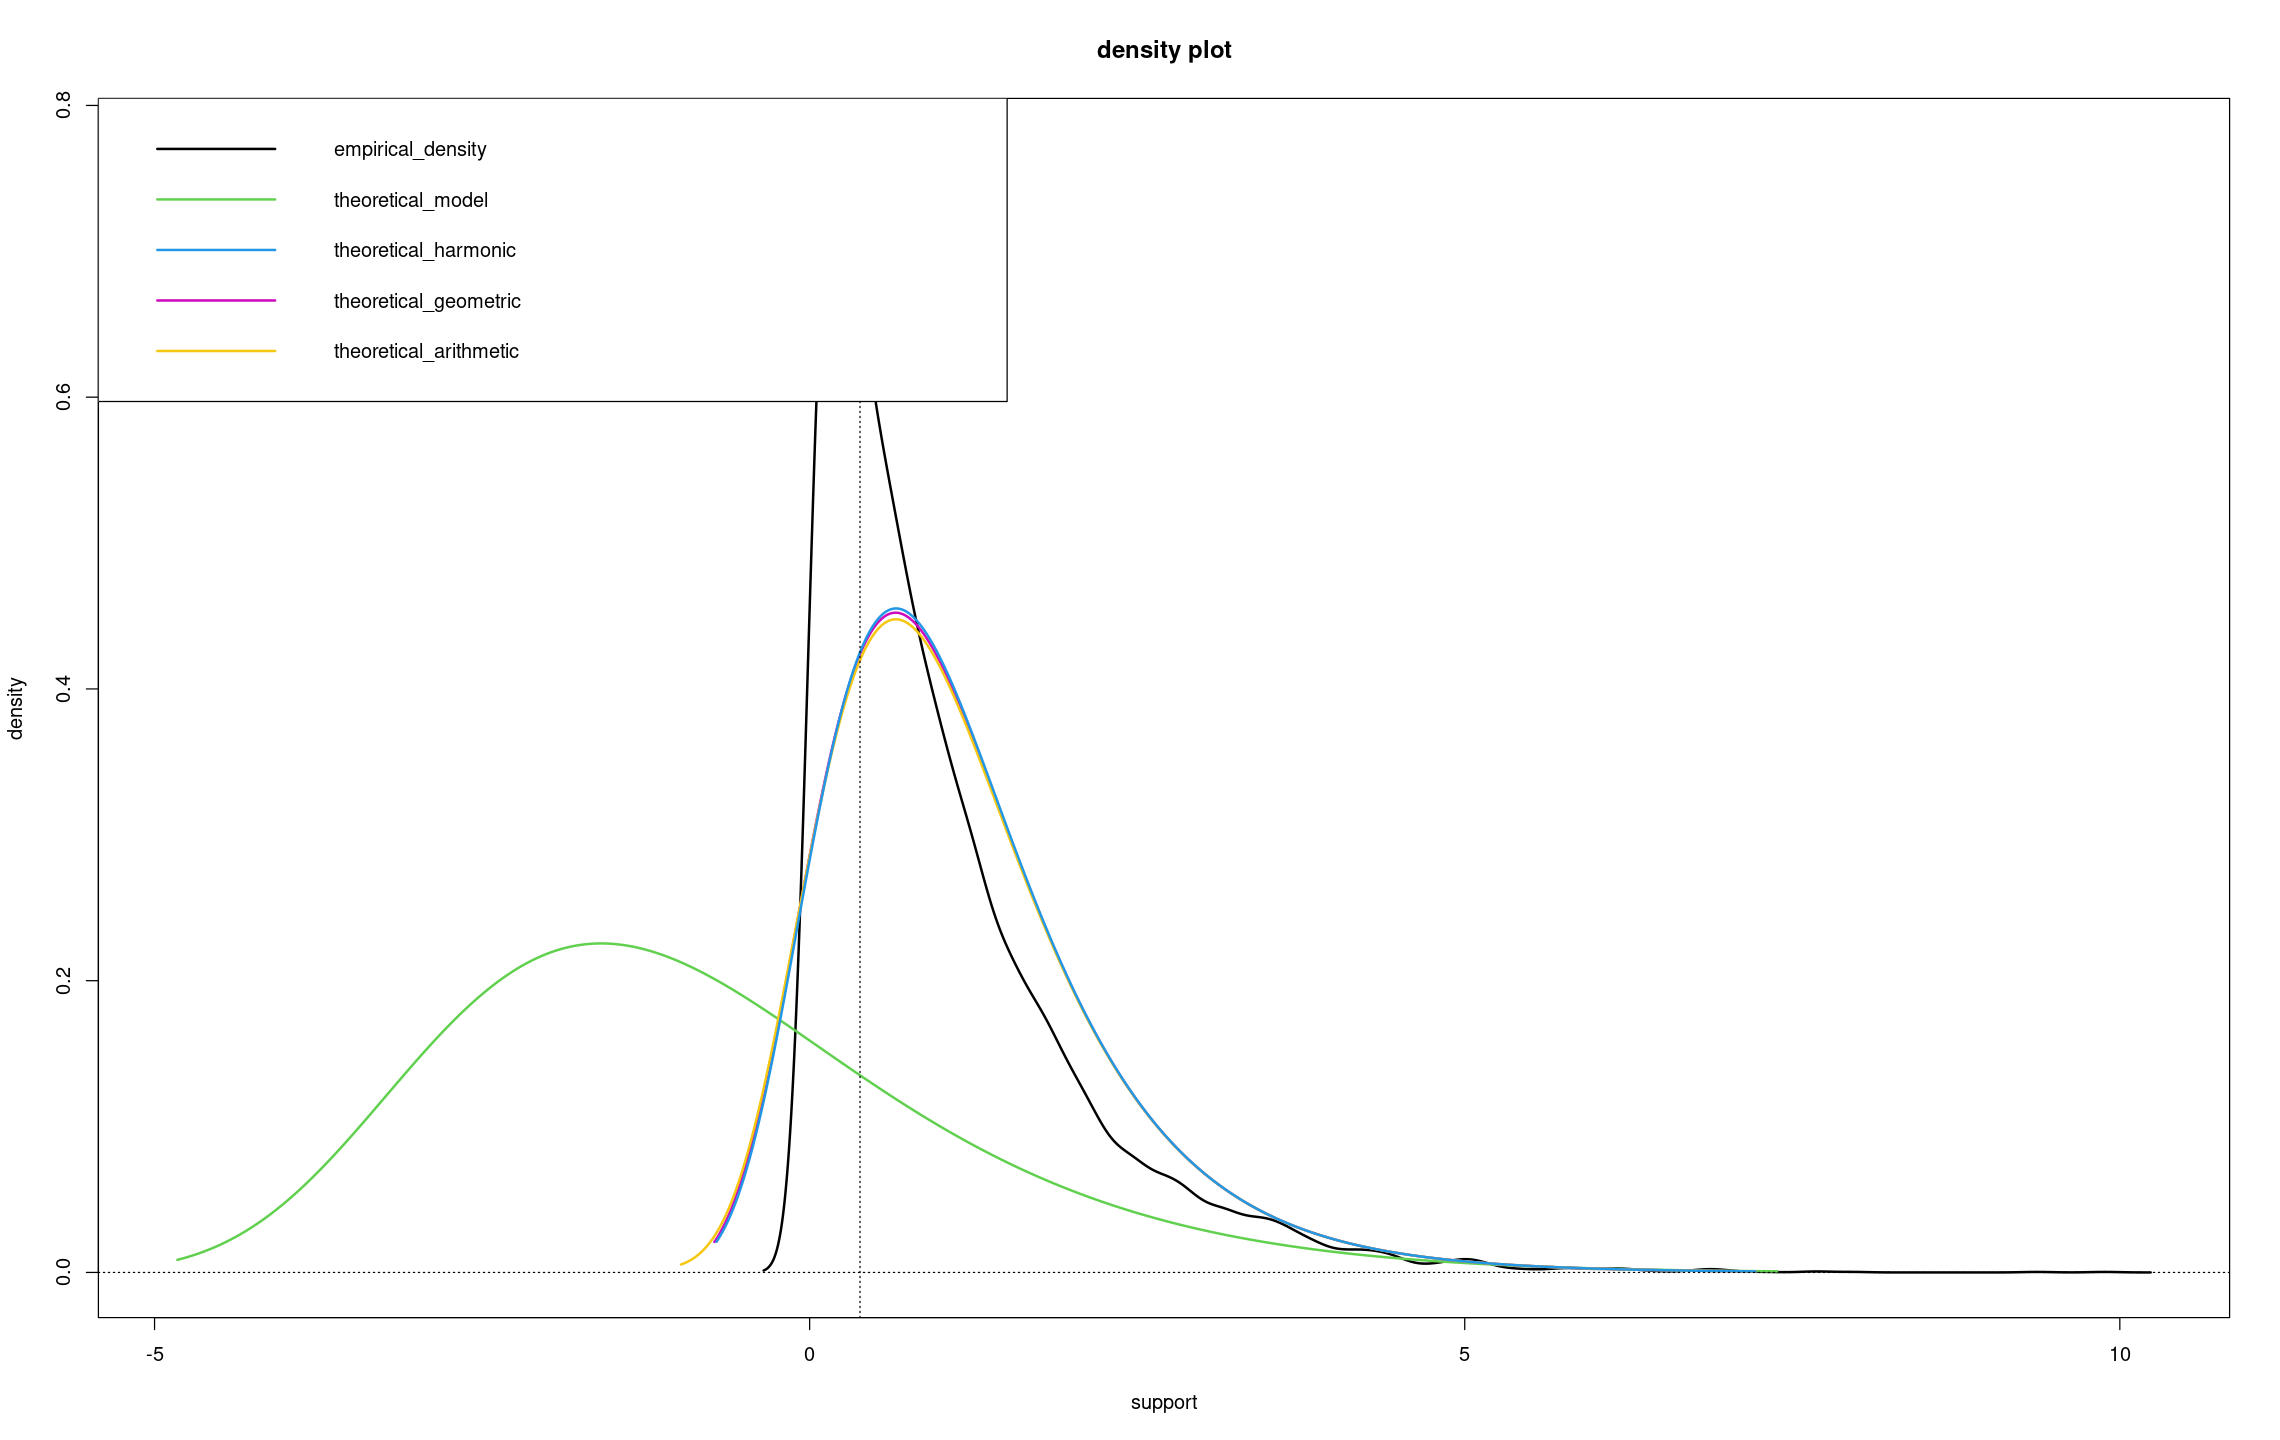

In [84]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.min(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star),
                                      iterations = 10,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topleft")

# Quantiles

In [85]:
alpha <- n^(-2)

print(alpha)

[1] 1e-08


In [86]:
true_quantile <- qexp(p = 1 - alpha)

print(true_quantile)

[1] 18.42068074


In [87]:
results_geometric <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                    alpha = alpha,
                                                                    do.ci = TRUE,
                                                                    confidence_level = 0.95,
                                                                    kind = c("geometric", "arithmetic", "harmonic")[1],
                                                                    iterations = 100)

results_geometric

$quantiles_object
      lower_bound    estimate upper_bound
6    16.384365944 27.48158360 38.57880126
87    1.931992132 14.33806723 26.74414232
98  -14.704367738 22.79013251 60.28463276
113  -5.726156451 17.66369804 41.05355253
157  -1.325273462 14.20512180 29.73551707
182  -4.662806307 14.59321526 33.84923682
197 -17.672416898 19.44717695 56.56677080

$gev_mixture_model_quantile
[1] 22.39621612

$smalest_lower_ci_bound
[1] -17.6724169

$largest_upper_ci_bound
[1] 60.28463276

$quantile_gev_inf
  lower_bound    estimate upper_bound
1 36.74201135 56.64699178  76.5519722

$quantile_gev_sup
  lower_bound    estimate upper_bound
1 4.408135217 5.925525645 7.442916074

In [88]:
results_arithmetic <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                     alpha = alpha,
                                                                     do.ci = TRUE,
                                                                     confidence_level = 0.95,
                                                                     kind = c("geometric", "arithmetic", "harmonic")[2],
                                                                     iterations = 100)

results_arithmetic

$quantiles_object
      lower_bound    estimate upper_bound
6    16.384365944 27.48158360 38.57880126
87    1.931992132 14.33806723 26.74414232
98  -14.704367738 22.79013251 60.28463276
113  -5.726156451 17.66369804 41.05355253
157  -1.325273462 14.20512180 29.73551707
182  -4.662806307 14.59321526 33.84923682
197 -17.672416898 19.44717695 56.56677080

$gev_mixture_model_quantile
[1] 22.39621607

$smalest_lower_ci_bound
[1] -17.6724169

$largest_upper_ci_bound
[1] 60.28463276

$quantile_gev_inf
  lower_bound    estimate upper_bound
1 36.74201135 56.64699178  76.5519722

$quantile_gev_sup
  lower_bound    estimate upper_bound
1 4.408135217 5.925525645 7.442916074

In [89]:
results_harmonic <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                     alpha = alpha,
                                                                     do.ci = TRUE,
                                                                     confidence_level = 0.95,
                                                                     kind = c("geometric", "arithmetic", "harmonic")[3],
                                                                     iterations = 100)

results_harmonic

$quantiles_object
      lower_bound    estimate upper_bound
6    16.384365944 27.48158360 38.57880126
87    1.931992132 14.33806723 26.74414232
98  -14.704367738 22.79013251 60.28463276
113  -5.726156451 17.66369804 41.05355253
157  -1.325273462 14.20512180 29.73551707
182  -4.662806307 14.59321526 33.84923682
197 -17.672416898 19.44717695 56.56677080

$gev_mixture_model_quantile
[1] 22.39621618

$smalest_lower_ci_bound
[1] -17.6724169

$largest_upper_ci_bound
[1] 60.28463276

$quantile_gev_inf
  lower_bound    estimate upper_bound
1 36.74201135 56.64699178  76.5519722

$quantile_gev_sup
  lower_bound    estimate upper_bound
1 4.408135217 5.925525645 7.442916074

In [90]:
options(repr.plot.width=23, repr.plot.height=6)

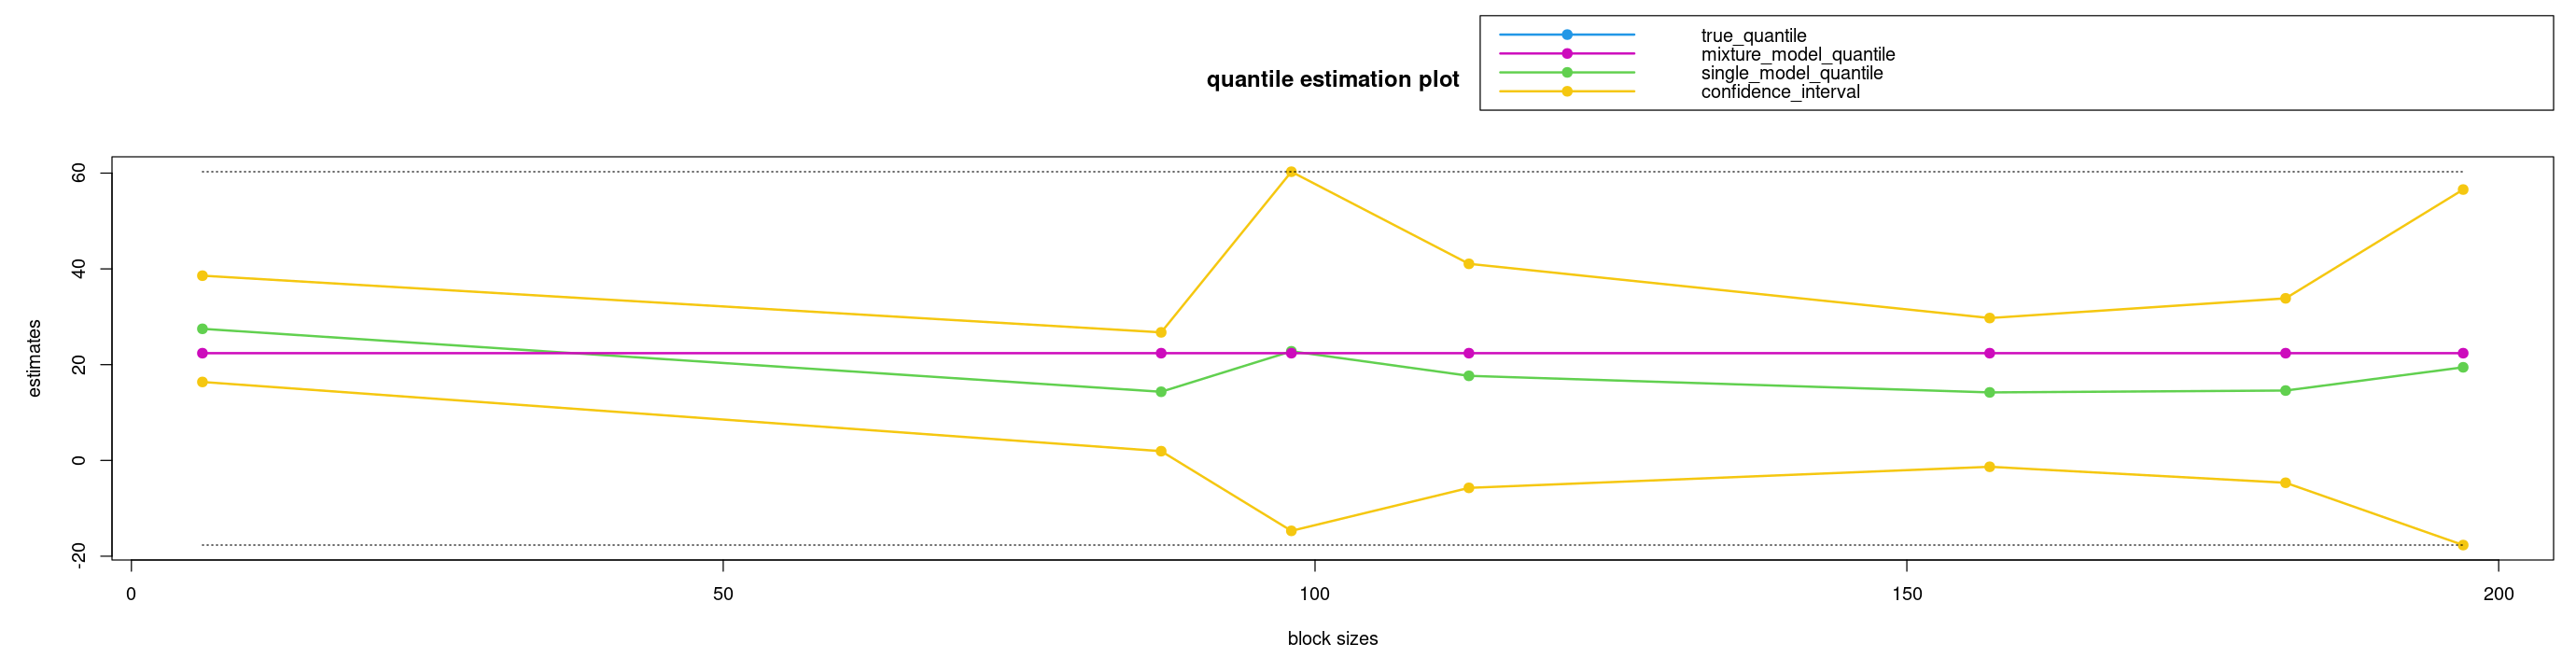

In [91]:
options(repr.plot.width=23, repr.plot.height=6)

plot_estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                    alpha = alpha,
                                                    true_quantile = NULL,
                                                    do.ci = TRUE,
                                                    confidence_level = 0.95,
                                                    kind = c("geometric", "arithmetic", "harmonic")[1],
                                                    iterations = 100,
                                                    xlab = "block sizes",
                                                    ylab = "estimates",
                                                    main = "quantile estimation plot",
                                                    legend_position = "topright")

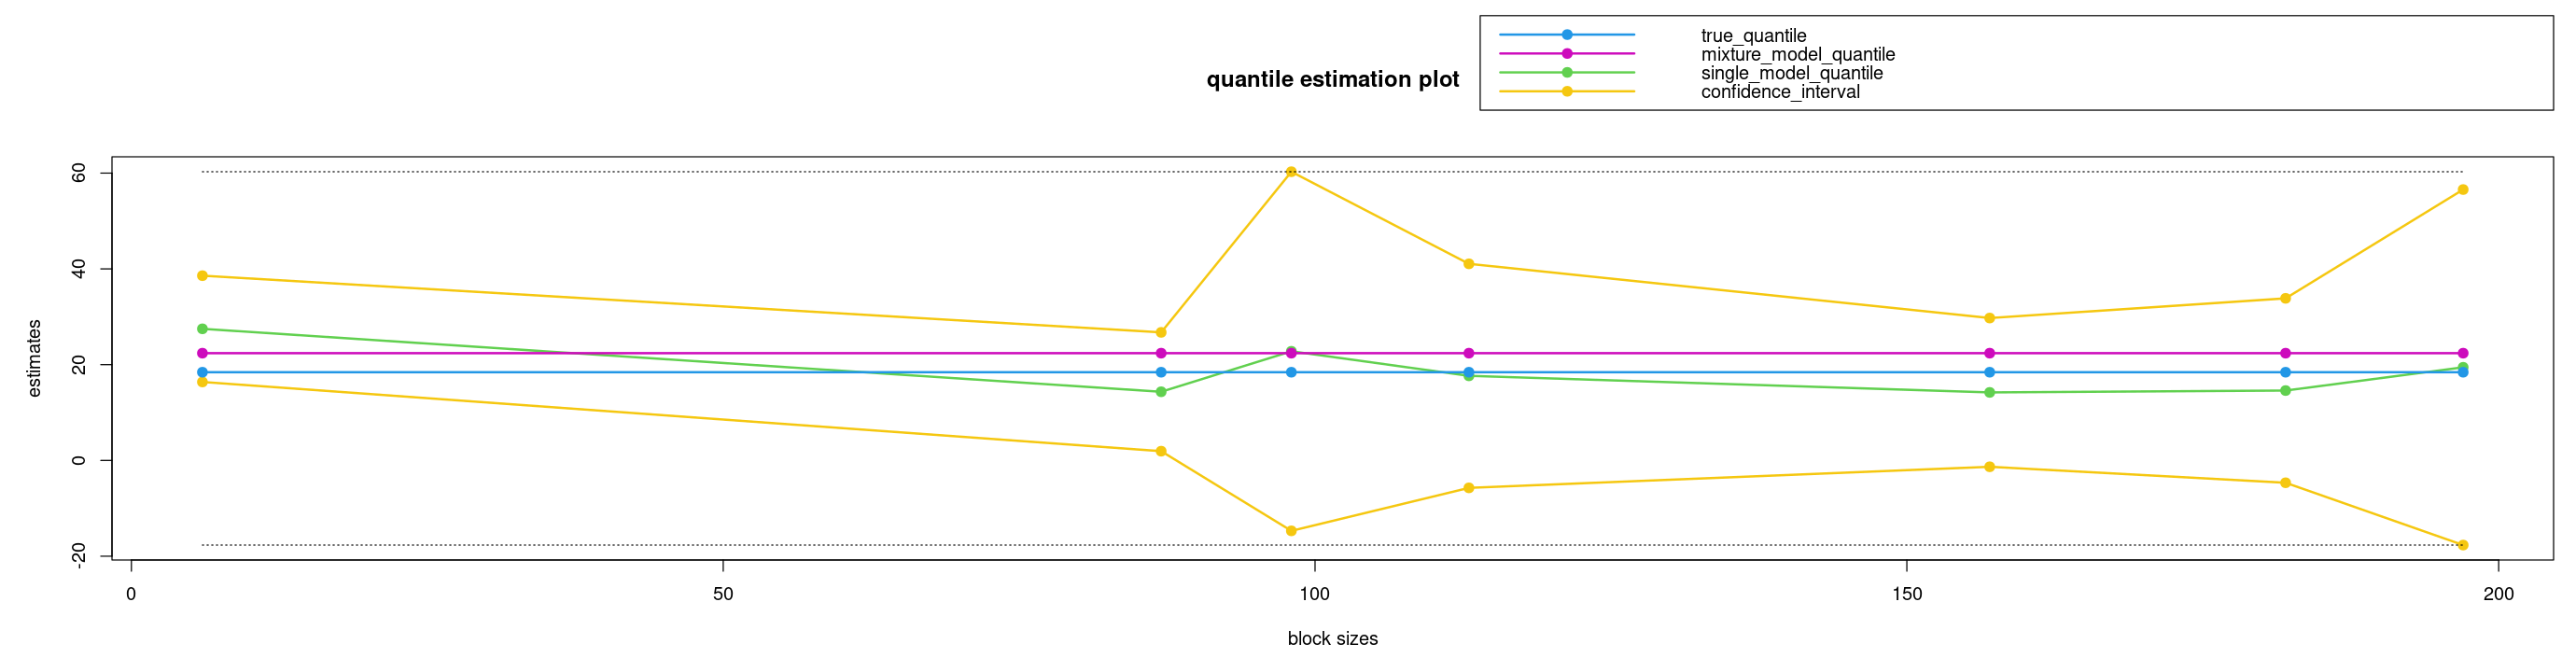

In [92]:
options(repr.plot.width=23, repr.plot.height=6)

plot_estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                    alpha = alpha,
                                                    true_quantile = true_quantile,
                                                    do.ci = TRUE,
                                                    confidence_level = 0.95,
                                                    kind = c("geometric", "arithmetic", "harmonic")[1],
                                                    iterations = 100,
                                                    xlab = "block sizes",
                                                    ylab = "estimates",
                                                    main = "quantile estimation plot",
                                                    legend_position = "topright")
